# 영상입력 이진분류 깊은 컨볼루션 신경망
* 영상을 입력해서 이진 분류할 수 있는 모델 생성 
* MNIST를 이용하여 홀수 / 짝수 구분 

### 사용할 패키지 선언 

In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras import utils

* 이미지 크기 

In [2]:
width = 28
height = 28

### 1. 데이터셋 생성하기
- 초기 라벨값은 0에서 9까지 정수로 지정
- 데이터 정규화를 위해서 255.0으로 나눔

#### 훈련셋과 시험셋 불러오기
- 컨볼루션 신경망 모델에 입력하기 위해 데이터셋 생성
- 샘플수, 너비, 높이, 채널수로 총 4차원 배열로 구성

In [3]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width, height, 1).astype('float32') / 255.0
x_test = x_test.reshape(10000, width, height, 1).astype('float32') / 255.0

#### 훈련셋과 검증셋 분리

In [4]:
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

#### 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환

In [5]:
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

### 2. 모델 구성하기(CNN 적용)

In [6]:
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(width, height, 1)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 4, 4, 64)          0

### 3. 모델 학습과정 설정하기

In [7]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

### 4.모델 학습시키기

In [8]:
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 192us/sample - loss: 0.4238 - accuracy: 0.7948 - val_loss: 0.1769 - val_accuracy: 0.9378
Epoch 2/30
50000/50000 [==============================] - 7s 144us/sample - loss: 0.1781 - accuracy: 0.9311 - val_loss: 0.0796 - val_accuracy: 0.9711
Epoch 3/30
50000/50000 [==============================] - 7s 144us/sample - loss: 0.1099 - accuracy: 0.9597 - val_loss: 0.0579 - val_accuracy: 0.9795
Epoch 4/30
50000/50000 [==============================] - 7s 144us/sample - loss: 0.0852 - accuracy: 0.9701 - val_loss: 0.0466 - val_accuracy: 0.9833
Epoch 5/30
50000/50000 [==============================] - 7s 144us/sample - loss: 0.0723 - accuracy: 0.9739 - val_loss: 0.0402 - val_accuracy: 0.9853
Epoch 6/30
50000/50000 [==============================] - 7s 144us/sample - loss: 0.0638 - accuracy: 0.9781 - val_loss: 0.0372 - val_accuracy: 0.9872
Epoch 7/30
50000/50000 [=========================

### 5. 학습과정 살펴보기

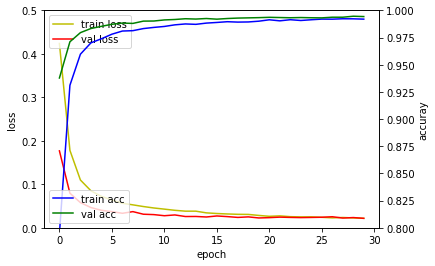

In [9]:
%matplotlib inline

fig, loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()                                        # loss_ax와 함께 acc_ax 그래프 같이 표현 

# loss 에 대한 그래프 
loss_ax.plot(hist.history['loss'], 'y', label='train loss')     # 노란색 선 
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')   # 빨간색 선 
loss_ax.set_ylim([0.0, 0.5])                                    # Y축 값 

# acc 에 대한 그래프 
acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')   # 파란색 선 
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc') # 녹색 선 
acc_ax.set_ylim([0.8, 1.0])

# x, y 축에 라벨 붙이기 
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuray')

# 범례 보이기 
loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

### 6. 모델 평가하기

In [10]:
loss, metrics = model.evaluate(x_test, y_test, batch_size=32)
print('loss : ', loss)
print('metrics : ', metrics)

10000/10000 [==============================] - 1s 63us/sample - loss: 0.0139 - accuracy: 0.9955
loss :  0.013904244403413032
metrics :  0.9955


### 7. 모델 사용하기

In [11]:
yhat_test = model.predict(x_test, batch_size=32)

### 데이터 셋 일부 확인하기 

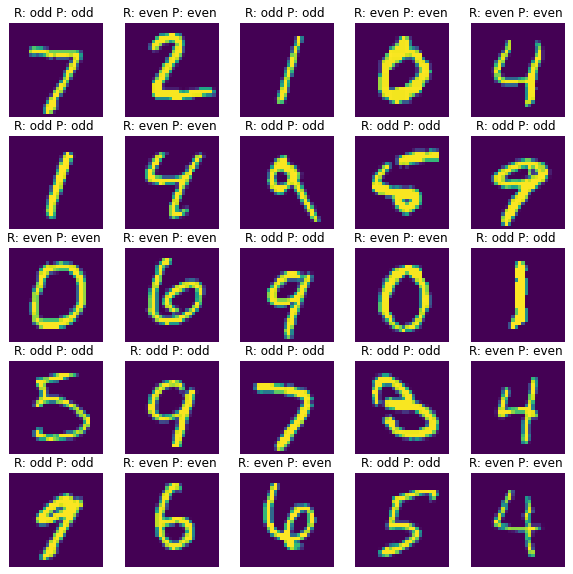

In [12]:
%matplotlib inline
plt_row = 5
plt_col = 5

plt.rcParams["figure.figsize"] = (10,10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row*plt_col):
    sub_plt = axarr[i//plt_row, i%plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))
    
    # 실제 값 
    sub_plt_title = 'R: '
    
    if y_test[i] :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    # 예측 값 
    sub_plt_title += 'P: '
    
    if yhat_test[i] >= 0.5 :
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '  
        
    sub_plt.set_title(sub_plt_title)
    
plt.show()